In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('customer_segmentation_data.csv')

In [4]:
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [6]:
data.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [7]:
# create a copy called data_segmaneted
data_segmented = data.copy()

In [8]:
data_segmented.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [9]:
data_segmented = data_segmented.fillna(0)

# create a corelation matrix to see the relationship between the variables
correlation_matrix = data.corr()
correlation_matrix

,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.117021,0.039048,-0.002699
CLV,0.117021,1.000000,-0.273312,-0.026359
region,0.039048,-0.273312,1.000000,0.015098
channel,-0.002699,-0.026359,0.015098,1.000000


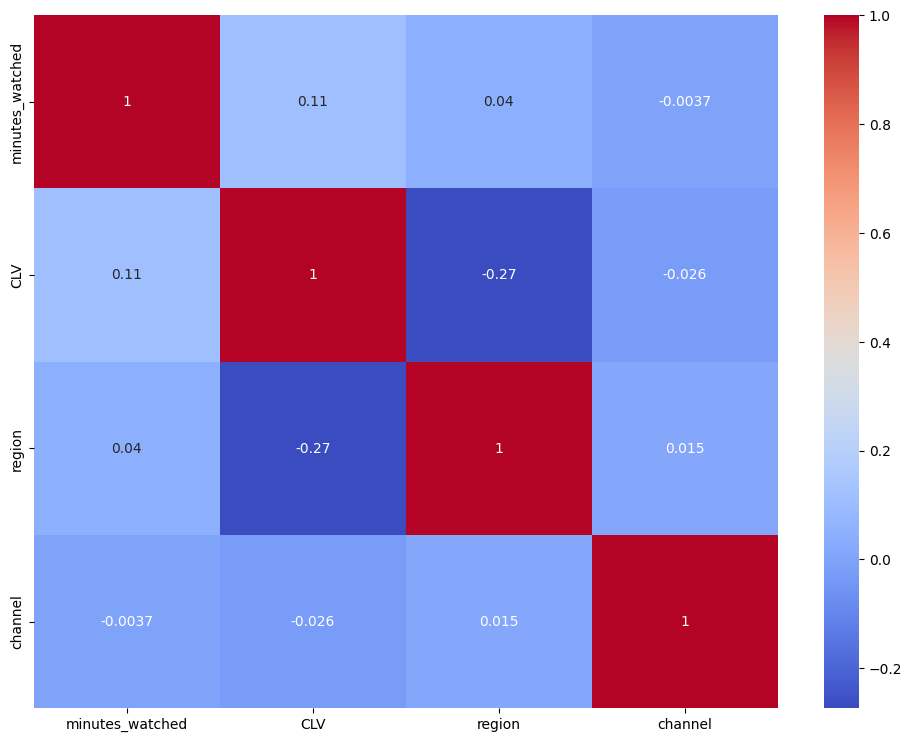

In [10]:
# plot the correlation matrix 
plt.figure(figsize=(12, 9))
sns.heatmap(data_segmented.corr(), annot=True, cmap='coolwarm')
plt.show()

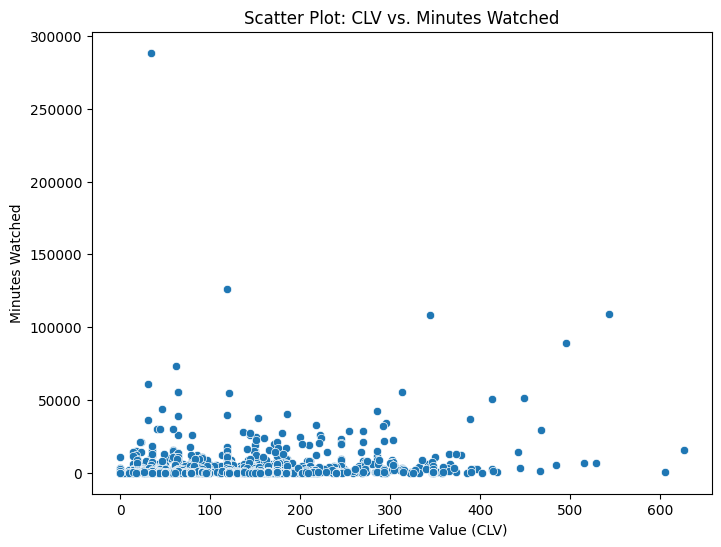

In [11]:
# Scatter plot for CLV (Customer Lifetime Value) vs. Minutes Watched
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CLV', y='minutes_watched')
plt.title("Scatter Plot: CLV vs. Minutes Watched")
plt.xlabel("Customer Lifetime Value (CLV)")
plt.ylabel("Minutes Watched")
plt.show()

In [12]:
# create a list of the channels of acquisition variable
data_channel = data_segmented['channel']

data_channel.head()

0    4
1    1
2    2
3    4
4    4
Name: channel, dtype: int64

In [13]:
# create a list of the channels of the country variable
data_regions = data_segmented['region'] 


data_regions.head()

0    2
1    0
2    2
3    2
4    1
Name: region, dtype: int64

In [14]:
# Get dummy variables for each unique value in 'channel'
df_dummies = pd.get_dummies(data['channel'].apply(pd.Series).stack())

# Use groupby on index and then sum the results
df_dummies = df_dummies.groupby(level=0).sum()

# Join the dummy variables to original dataframe
data = data.join(df_dummies)

In [15]:
data.head()

,minutes_watched,CLV,region,channel,1,2,3,4,5,6,7,8
0,3197.0,205.42,2,4,0,0,0,1,0,0,0,0
1,63.0,149.99,0,1,1,0,0,0,0,0,0,0
2,605.0,119.00,2,2,0,1,0,0,0,0,0,0
3,20.0,240.00,2,4,0,0,0,1,0,0,0,0
4,245.0,184.36,1,4,0,0,0,1,0,0,0,0


In [16]:
# identical dummies for the channel of aquisition
segment_dummies = pd.get_dummies(data_channel, prefix = 'channel', prefix_sep = '_')

In [17]:
segment_dummies.head()

,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False


In [18]:
data_segmented = pd.concat([data_segmented, segment_dummies], axis = 1)

In [19]:
data_segmented.head()

,minutes_watched,CLV,region,channel,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,2,4,False,False,False,True,False,False,False,False
1,63.0,149.99,0,1,True,False,False,False,False,False,False,False
2,605.0,119.00,2,2,False,True,False,False,False,False,False,False
3,20.0,240.00,2,4,False,False,False,True,False,False,False,False
4,245.0,184.36,1,4,False,False,False,True,False,False,False,False


In [20]:
# Each column in `df_countries` will be prefixed with 'country_region_' in the new columns.
segment_dummies_2 = pd.get_dummies(data_regions, prefix = 'country_region', prefix_sep = '_')

# Appending the created dummy columns from `segment_dummies_2` to the `df_segmentation` dataframe.
data_segmented = pd.concat([data_segmented, segment_dummies_2], axis = 1)

In [21]:
data_segmented.head()

,minutes_watched,CLV,region,channel,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,4,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,1,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,4,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,4,False,False,False,True,False,False,False,False,False,True,False


In [22]:
# drop the channel and region columns
data_segmented = data_segmented.drop(['channel'], axis = 1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
data_segmented.head()

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False


In [25]:
# Standardize the numerical features
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_segmented)

In [26]:
segmentation_std

array([[ 0.17542513,  1.23521866,  0.90235187, ..., -0.74396546,
        -0.36969391,  0.95410372],
       [-0.25376647,  0.44855443, -1.26464912, ...,  1.34414843,
        -0.36969391, -1.04810408],
       [-0.17954125,  0.00874342,  0.90235187, ..., -0.74396546,
        -0.36969391,  0.95410372],
       ...,
       [-0.25458815, -1.16919507,  0.90235187, ..., -0.74396546,
        -0.36969391,  0.95410372],
       [-0.25636846, -1.16919507,  0.90235187, ..., -0.74396546,
        -0.36969391,  0.95410372],
       [-0.26239413, -0.55893778, -1.26464912, ...,  1.34414843,
        -0.36969391, -1.04810408]])

In [27]:
# Performing hierarchical clustering on the standardized data using the 'ward' method.
# The 'ward' method minimizes the sum of squared differences within all clusters.
hier_clust = linkage(segmentation_std, method = 'ward')

In [28]:
hier_clust

array([[4.94000000e+02, 3.22000000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.28600000e+03, 3.83400000e+03, 0.00000000e+00, 3.00000000e+00],
       [7.37000000e+02, 3.50800000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [7.65100000e+03, 7.65200000e+03, 9.11254204e+01, 5.91000000e+02],
       [7.66200000e+03, 7.66400000e+03, 9.40298059e+01, 2.28200000e+03],
       [7.66300000e+03, 7.66500000e+03, 1.18522873e+02, 3.83400000e+03]])

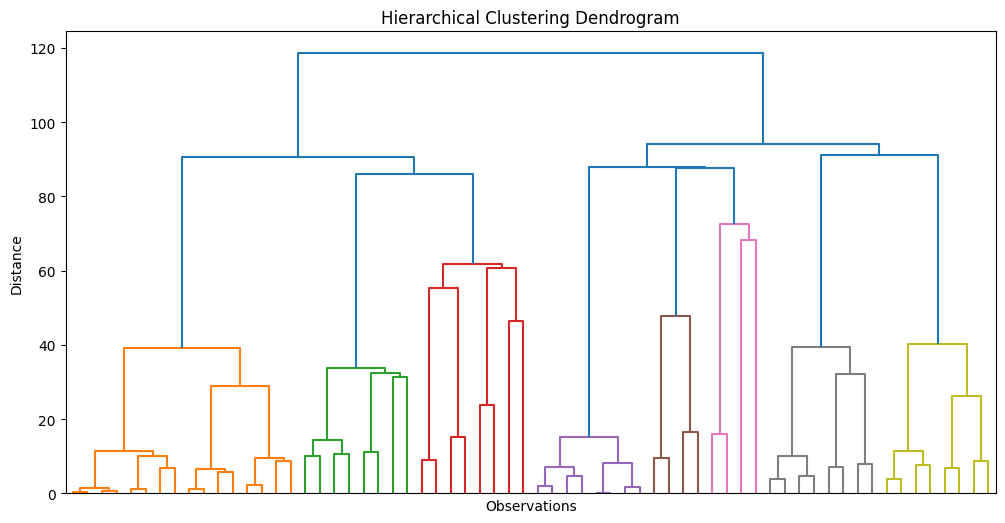

In [29]:
# Setting the figure size for the plot.
plt.figure(figsize = (12,6))

# Setting the title of the dendrogram.
plt.title('Hierarchical Clustering Dendrogram')

# Labeling the x-axis as 'Observations'.
plt.xlabel('Observations')

# Labeling the y-axis as 'Distance'.
plt.ylabel('Distance')

# Creating the dendrogram for the hierarchical clustering result.
# We're truncating the dendrogram to show only the last 5 merged clusters.
# Leaf counts and labels are not displayed.
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)

# Saving the dendrogram plot as a PNG image named 'hierarchical.png'.
plt.savefig('hierarchical.png')

# Displaying the dendrogram.
plt.show()

In [30]:
# apply kmeans clustering from range 1 to 11
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

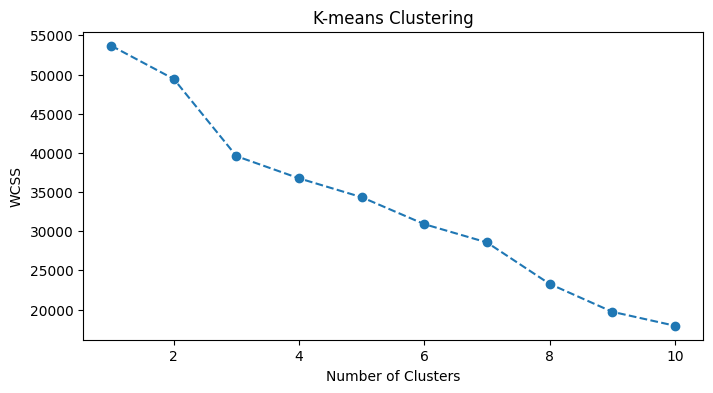

In [31]:
# Plotting the Within Cluster Sum of Squares for the range of clusters from 1 to 11.
plt.figure(figsize = (8,4))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# use 8 as the number of clusters
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)

# Fit the k-means clustering model on the standardized data.
kmeans.fit(segmentation_std)

KMeans(random_state=42)

In [33]:
# create a copy of the dataframe segmented
data_segm_kmeans = data_segmented.copy()

In [35]:
# assign the cluster labels to the dataframe
data_segm_kmeans['Segment'] = kmeans.labels_

In [36]:
data_segm_kmeans.head()

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2,Segment
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True,2
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False,1
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True,0
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True,2
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False,2


In [38]:
df_segm_analysis = data_segm_kmeans.groupby(['Segment']).mean()

df_segm_analysis

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
Segment,,,,,,,,,,,,,,
0,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.287582,0.101307,0.611111
1,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.0,0.140284,1.000000,0.000000,0.000000
2,1763.190889,100.376616,1.848156,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.151844,0.848156
3,1800.537897,111.313594,1.801956,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.198044,0.801956
4,2486.479434,118.394974,1.785347,0.000000,0.0,0.820051,0.000000,0.0,0.0,0.0,0.179949,0.000000,0.214653,0.785347
5,2006.190377,113.654038,1.372385,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.257322,0.112971,0.629707
6,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.172414,0.051724,0.775862
7,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.311419,0.190311,0.498270


In [ ]:
# Counting the number of observations in each segment.
# This is done by grouping by 'Segment' and counting the occurrences.
# 'Region_0' is used arbitrarily to count, as it exists in each segment.
df_segm_analysis['N Obs'] = data_segm_kmeans[['Segment','country_region_0']].groupby(['Segment']).count()


# Calculating the proportion of observations in each segment.
# This is done by dividing the number of observations in a segment by the total number of observations.
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [45]:
df_segm_analysis.head()

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.287582,0.101307,0.611111,306,0.079812
1,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.0,0.140284,1.000000,0.000000,0.000000,1055,0.275170
2,1763.190889,100.376616,1.848156,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.151844,0.848156,461,0.120240
3,1800.537897,111.313594,1.801956,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.198044,0.801956,409,0.106677
4,2486.479434,118.394974,1.785347,0.000000,0.0,0.820051,0.000000,0.0,0.0,0.0,0.179949,0.000000,0.214653,0.785347,778,0.202921


In [46]:
# Rounding the dataframe values to 2 decimal places for cleaner presentation.
df_segm_analysis.round(2)

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,2767.64,108.26,1.32,0.00,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.29,0.10,0.61,306,0.08
1,1539.15,136.33,0.00,0.25,0.0,0.43,0.18,0.0,0.0,0.0,0.14,1.00,0.00,0.00,1055,0.28
2,1763.19,100.38,1.85,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.00,0.00,0.15,0.85,461,0.12
3,1800.54,111.31,1.80,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.20,0.80,409,0.11
4,2486.48,118.39,1.79,0.00,0.0,0.82,0.00,0.0,0.0,0.0,0.18,0.00,0.21,0.79,778,0.20
5,2006.19,113.65,1.37,0.00,0.0,0.00,0.00,0.0,0.0,1.0,0.00,0.26,0.11,0.63,478,0.12
6,985.33,93.15,1.60,0.00,0.0,0.00,0.00,1.0,0.0,0.0,0.00,0.17,0.05,0.78,58,0.02
7,1299.33,115.18,1.19,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.00,0.31,0.19,0.50,289,0.08


In [47]:
df_segm_analysis.head()

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.287582,0.101307,0.611111,306,0.079812
1,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.0,0.140284,1.000000,0.000000,0.000000,1055,0.275170
2,1763.190889,100.376616,1.848156,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.151844,0.848156,461,0.120240
3,1800.537897,111.313594,1.801956,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.198044,0.801956,409,0.106677
4,2486.479434,118.394974,1.785347,0.000000,0.0,0.820051,0.000000,0.0,0.0,0.0,0.179949,0.000000,0.214653,0.785347,778,0.202921


In [48]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
df_segm_analysis.rename({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel', 
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers', 
                        })

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
Instagram Explorers,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.287582,0.101307,0.611111,306,0.079812
LinkedIn Networkers,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.0,0.140284,1.000000,0.000000,0.000000,1055,0.275170
Friends' Influence,1763.190889,100.376616,1.848156,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.151844,0.848156,461,0.120240
Google-YouTube Mix,1800.537897,111.313594,1.801956,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.198044,0.801956,409,0.106677
Anglo-Saxon Multi-Channel,2486.479434,118.394974,1.785347,0.000000,0.0,0.820051,0.000000,0.0,0.0,0.0,0.179949,0.000000,0.214653,0.785347,778,0.202921
European Multi-Channel,2006.190377,113.654038,1.372385,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.257322,0.112971,0.629707,478,0.124674
Twitter Devotees,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.172414,0.051724,0.775862,58,0.015128
Facebook Followers,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.311419,0.190311,0.498270,289,0.075378


In [49]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
data_segm_kmeans['Labels'] = data_segm_kmeans['Segment'].map({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel', 
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers', 
                        })

In [50]:
data_segm_kmeans.head()

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2,Segment,Labels
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True,2,Friends' Influence
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False,1,LinkedIn Networkers
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True,0,Instagram Explorers
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True,2,Friends' Influence
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False,2,Friends' Influence


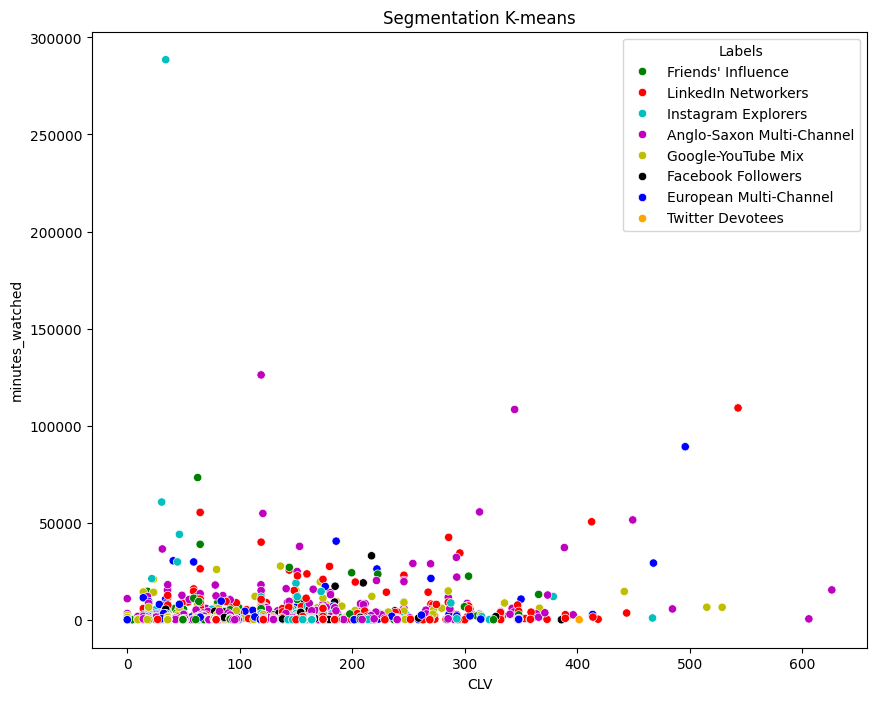

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot minutes watched vs CLV where each cluster is represented by a different color
x_axis = data_segm_kmeans['CLV']
y_axis = data_segm_kmeans['minutes_watched']
plt.figure(figsize=(10, 8))

# Ensure the palette is long enough for the number of unique labels
unique_labels = data_segm_kmeans['Labels'].nunique()
palette = sns.color_palette('hsv', unique_labels) if unique_labels > 8 else ['g', 'r', 'c', 'm', 'y', 'k', 'b', 'orange']

sns.scatterplot(x=x_axis, y=y_axis, hue=data_segm_kmeans['Labels'], palette=palette)
plt.title('Segmentation K-means')
plt.show()